# 🛒 EPOCH 5th Pilot Task Week1 (박정민)
> **주제: BMI 지수와 실제 비만 등급의 괴리 분석**


## Task1.  데이터 출처 설명 / 데이터 불러오기

- 데이터: Kaggle - Obesity Levels
(https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data)
- 데이터셋 정보: This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**컬럼 정보 (영문)**

- Gender: Feature, Categorical, "Gender" (성별)
- Age : Feature, Continuous, "Age" (나이)
- Height: Feature, Continuous (키)
- Weight: Feature Continuous (몸무게)
- family_history_with_overweight: Feature, Binary, "Has a family member suffered or suffers from overweight?" (과체중 가족력)

- FAVC : Feature, Binary, "Do you eat high caloric food frequently?"
- FCVC : Feature, Integer, "Do you usually eat vegetables in your meals?"
- NCP : Feature, Continuous, "How many main meals do you have daily?"
- CAEC : Feature, Categorical, "Do you eat any food between meals?"
- SMOKE : Feature, Binary, "Do you smoke?"
- CH2O: Feature, Continuous, "How much water do you drink daily?"
- SCC: Feature, Binary, "Do you monitor the calories you eat daily?"
- FAF: Feature, Continuous, "How often do you have physical activity?"
- TUE : Feature, Integer, "How much time do you use technological devices such as cell phone, videogames, television, computer and others?"

- CALC : Feature, Categorical, "How often do you drink alcohol?"
- MTRANS : Feature, Categorical, "Which transportation do you usually use?"
- NObeyesdad : Target, Categorical, "Obesity level"

**컬럼 정보 (한글)**  
- 수치형
> - Age : 나이
> - Height: 키
> - Weight: 몸무게
> - FCVC : 채소 섭취 빈도
> - NCP : 하루 섭취 끼니수
> - CH2O: 하루 섭취 물 양
> - FAF: 신체 활동 빈도
> - TUE : 전자기기 사용 빈도(휴대폰, 비디오게임, TV, 컴퓨터 등)

- 범주형
> - Gender: 성별
> - family_history_with_overweight: 과체중 가족력
> - FAVC : 고칼로리 음식 섭취 빈도
> - CAEC : 식사 사이 군것질 빈도
> - SMOKE : 흡연 여부
> - SCC: 섭취 칼로리 모니터링 여부
> - CALC : 알콜 섭취 빈도
> - MTRANS : 주로 사용하는 교통수단
> - NObeyesdad : 비만 수준

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('ObesityDataSet_raw.csv')
df_raw = df.copy()

In [5]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## Task2.기초 통계 확인

### 데이터 형태 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [31]:
df.shape

(2111, 17)

In [109]:
df.nunique()

,0
Age,1402
Gender,2
Height,1574
Weight,1525
CALC,4
FAVC,2
FCVC,810
NCP,635
SCC,2
SMOKE,2


### 수치형 변수 확인

In [20]:
df.describe() # 수치형 확인

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


1. age, height, weight 이상치 확인
> Age: 14세 ~ 61세  
> Height: 145cm ~ 198cm  
> Weight: 39kg ~ 173kg  
=> 추후 Boxplot으로 확인해보기

2. 변수별 라벨 확인
> FCVC: 1(채소 거의 안먹음, 가끔), 2(보통), 3(자주)  
> NCP: 1(하루 1회 식사), 2, 3, 4  
> CH2O: 1(1L 미만), 2(1L 이상 2L 미만), 3(2L 이상)  
> FAF: 0(안함), 1(1 ~ 2일), 2(2 ~ 4일), 3(4일 이상)  
> TUE: 0(0 ~ 2시간), 1(2 ~ 5시간), 2(5시간 초과)

### 범주형 변수 확인

In [21]:
df.describe(include='object')

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [25]:
df['CALC'].value_counts()

,count
CALC,
Sometimes,1401
no,639
Frequently,70
Always,1


In [27]:
df['MTRANS'].value_counts()

,count
MTRANS,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


In [28]:
df['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


### 결측치 확인

In [29]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


- 결측치는 존재하지 않음을 알 수 있음 (77%가 SMOTE로 인한 복제 데이터이기에)

### 중복 데이터 확인

In [62]:
df.duplicated().sum()

np.int64(24)

- 중복데이터가 2111개의 데이터 중 24개 존재함

In [65]:
duplicates = df[df.duplicated()]
print(duplicates.sort_values)

<bound method DataFrame.sort_values of       Age  Gender  Height  Weight       CALC FAVC  FCVC  NCP SCC SMOKE  CH2O  \
98   21.0  Female    1.52    42.0  Sometimes   no   3.0  1.0  no    no   1.0   
106  25.0  Female    1.57    55.0  Sometimes  yes   2.0  1.0  no    no   2.0   
174  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
179  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
184  21.0    Male    1.62    70.0  Sometimes  yes   2.0  1.0  no    no   3.0   
209  22.0  Female    1.69    65.0  Sometimes  yes   2.0  3.0  no    no   2.0   
309  16.0  Female    1.66    58.0         no   no   2.0  1.0  no    no   1.0   
460  18.0  Female    1.62    55.0         no  yes   2.0  3.0  no    no   1.0   
467  22.0    Male    1.74    75.0         no  yes   3.0  3.0  no    no   1.0   
496  18.0    Male    1.72    53.0  Sometimes  yes   2.0  3.0  no    no   2.0   
527  21.0  Female    1.52    42.0  Sometimes  yes   3.0  1.0  no    no   1.0   
6

In [66]:
duplicates.drop_duplicates(inplace=True)
duplicates

/tmp/ipython-input-1010/2943327219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.drop_duplicates(inplace=True)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
106,25.0,Female,1.57,55.0,Sometimes,yes,2.0,1.0,no,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
209,22.0,Female,1.69,65.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
467,22.0,Male,1.74,75.0,no,yes,3.0,3.0,no,no,1.0,yes,1.0,0.0,Frequently,Automobile,Normal_Weight
496,18.0,Male,1.72,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,yes,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
527,21.0,Female,1.52,42.0,Sometimes,yes,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight


- 중복 데이터를 제거하는게 좋아보인다!! (24개 중복 => 24/2111 = 1.13% 제거)

## Task3. 분석 목적/인사이트 설명

1. BMI의 한계 실증 및 비만에 대한 정의
> 목적: 단순히 '키'와 '몸무게'로 계산한 BMI지수가 실제 비만 수준을 얼마나 잘 나타내는지 확인 및 검증한다.  
> 인사이트: BMI 기준으로 정상이나, 실제 비만 등급은 과체중이상으로 나오는 그룹을 확인한다.

2. 비만 결정 요인 확인 및 도출
> 목적: 생활 습관 변수 중 어떤 습관이 비만 등급을 결정 짓는 가장 치명적인 요인인지 파악한다.  
> 인사이트: 피쳐 엔지니어링을 통한 파생변수 생성으로 데이터 기반의 구체적인 생활 가이드라인을 제시할 수 있다.

3. 비만 잠재적 위험군 파악
> 목적: 현재 비만 수준이 아니더라도 '잠재적 위험군'을 분류하는 로직을 고안할 수 있다.  
> 인사이트: 유전력 혹은 잘못된 식습관을 가졌을 때 비만으로 이어질 확률을 계산해볼 수 있다. 이는 헬스케어 서비스에서 개인별 맞춤형 알림을 보내는 기능으로 확장이 가능하다.

## Task4. EDA - 변수 간 관계 분석 및 유의미한 시각화 "3개 이상"

### 중복데이터 제거

In [67]:
df.drop_duplicates(inplace=True)
df.shape

(2087, 17)

- (2111,17) -> (2087, 17) / 24개 삭제

### 수치형, 범주형 히스토그램 및 분포 확인

In [75]:
import warnings
warnings.filterwarnings('ignore')

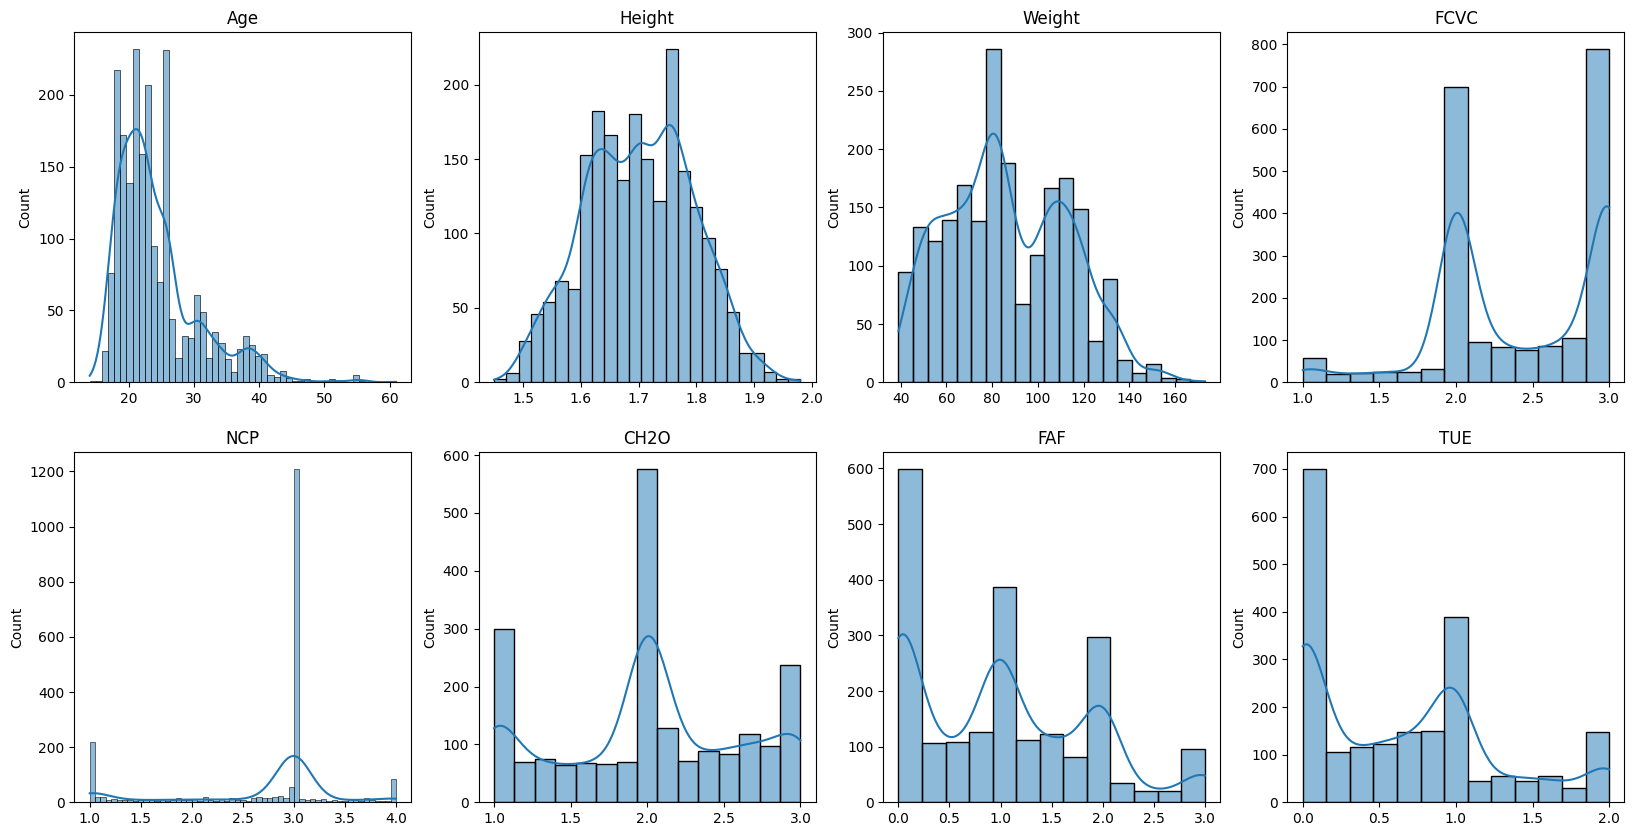

In [41]:
# 수치형 변수 (8개)
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
    axes[i//4, i%4].set_xlabel('')
plt.show()

- SMOTE기법으로 데이터가 만들어져있기에 이 점을 유의해야 한다.

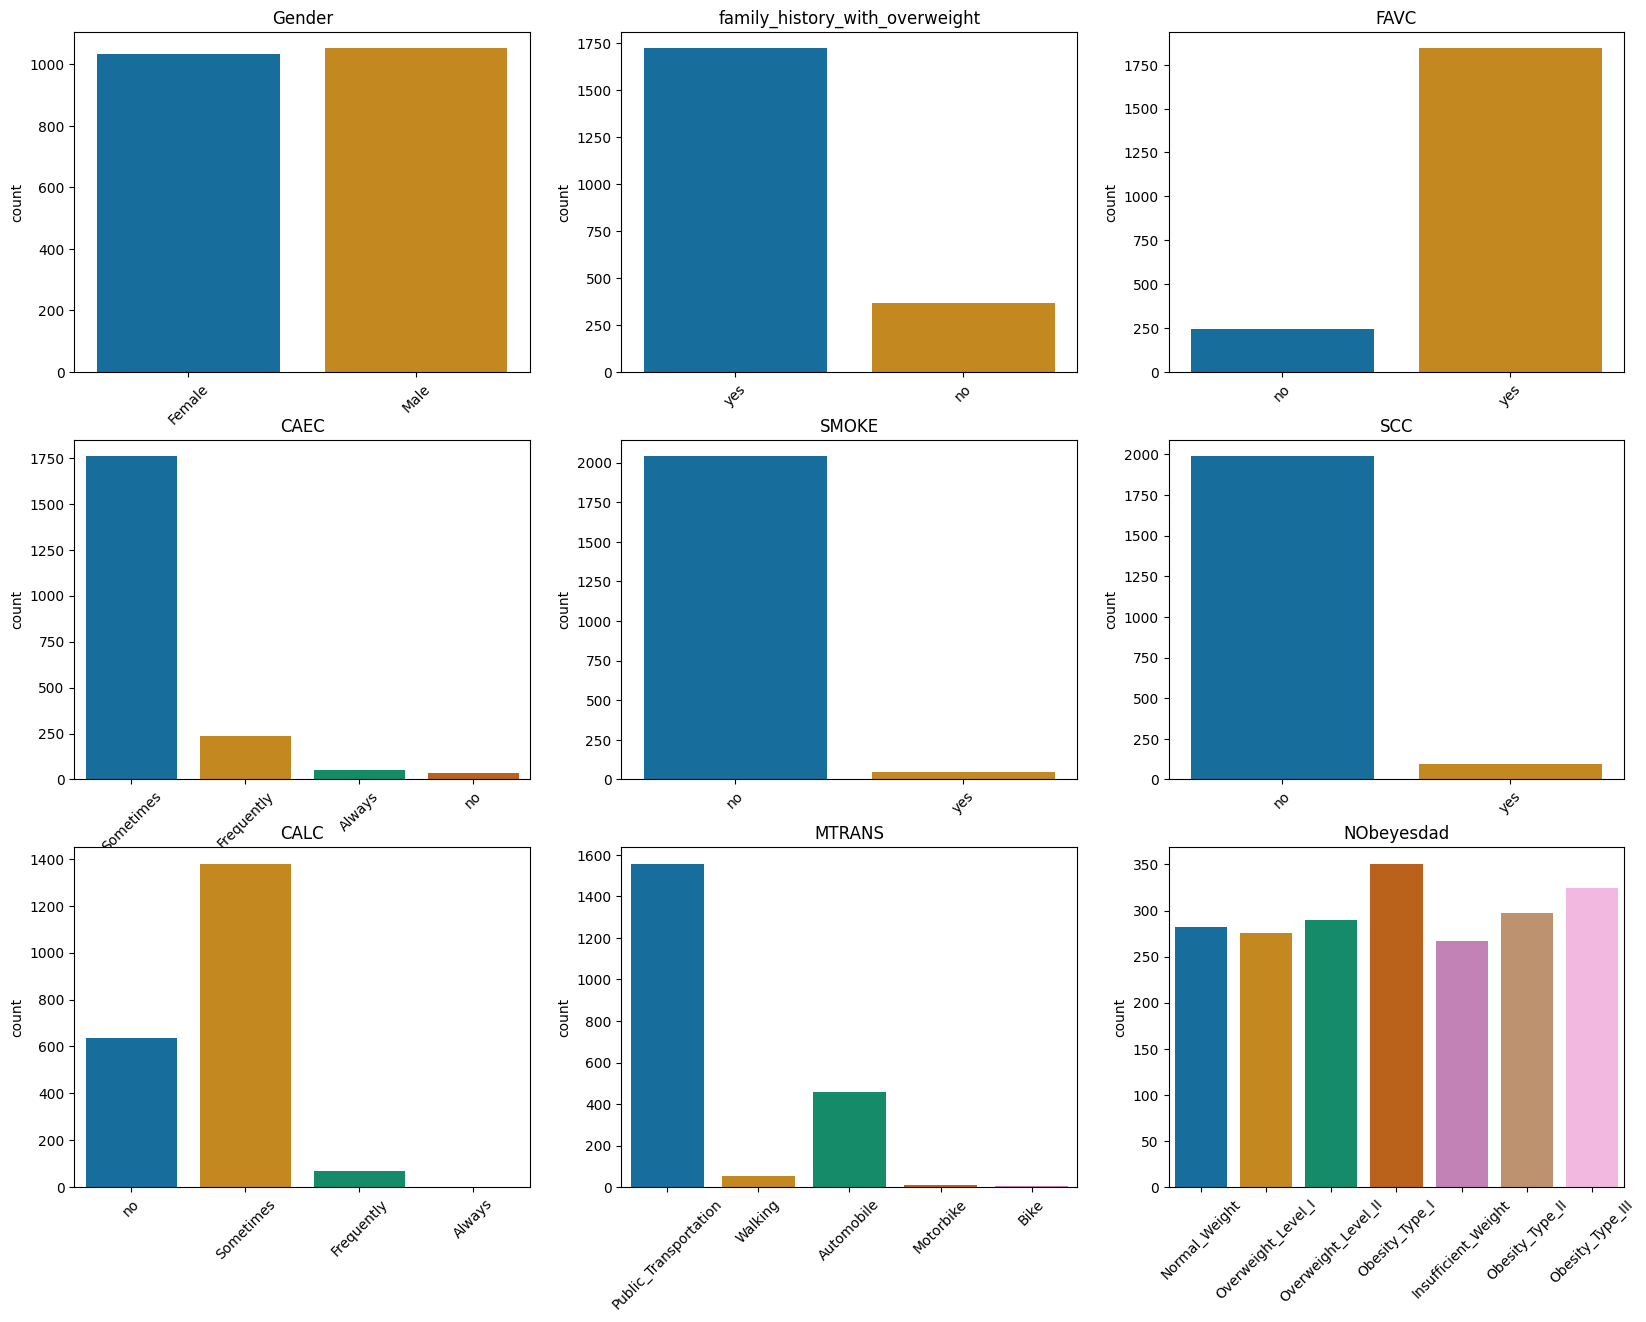

In [77]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
            'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3], palette='colorblind')
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
    axes[i//3, i%3].set_xlabel('')
plt.show()

- 불균형적인 범주 데이터가 존재하기에 이 점을 유의해야한다.

### Gender에 따른 Age, Height, Weight 이상치 확인 (Boxplot)

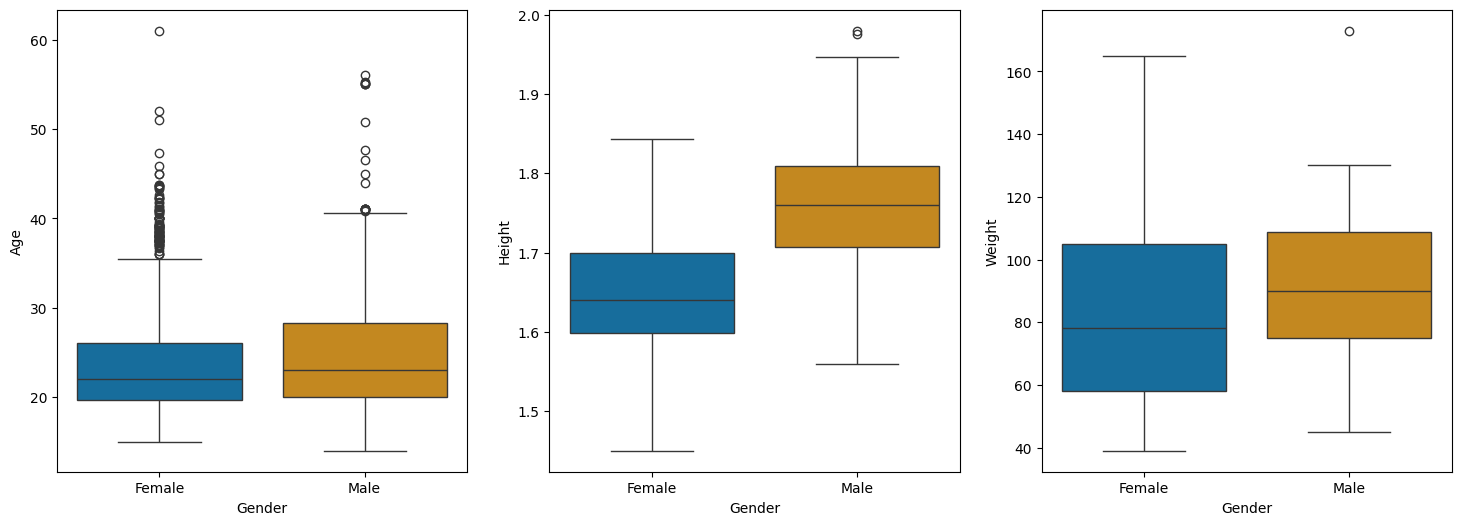

In [76]:
features = ['Age', 'Height', 'Weight']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(features):
    sns.boxplot(x='Gender', y=col, data=df, ax=axes[i], palette='colorblind')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(col)
plt.show()

In [90]:
m = df[df['Gender'] == 'Male']
cols = ['Height', 'Weight']

q1, q3 = m[cols].quantile(0.25), m[cols].quantile(0.75)
mask = ((m[cols] < q1 - 1.5*(q3-q1)) | (m[cols] > q3 + 1.5*(q3-q1))).any(axis=1)

m[mask]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
344,18.000000,Male,1.870000,173.000000,Sometimes,yes,3.0,3.0,no,no,2.0,yes,2.000000,1.0,Frequently,Public_Transportation,Obesity_Type_III
349,20.000000,Male,1.980000,125.000000,Sometimes,yes,2.0,3.0,no,no,3.0,yes,1.000000,1.0,Always,Public_Transportation,Obesity_Type_I
1350,20.491475,Male,1.975663,120.702935,Sometimes,yes,2.0,3.0,no,no,3.0,yes,0.767013,1.0,Sometimes,Public_Transportation,Obesity_Type_I


- 이상치의 경우 잘못 기재가 되어있는 데이터가 아닌 것으로 보이기에 제거하진 않고 이상치에 강한 트리 앙상블기법을 사용하여 보는 것이 좋아보인다.

### 비만 수준에 따른 변수들 시각화

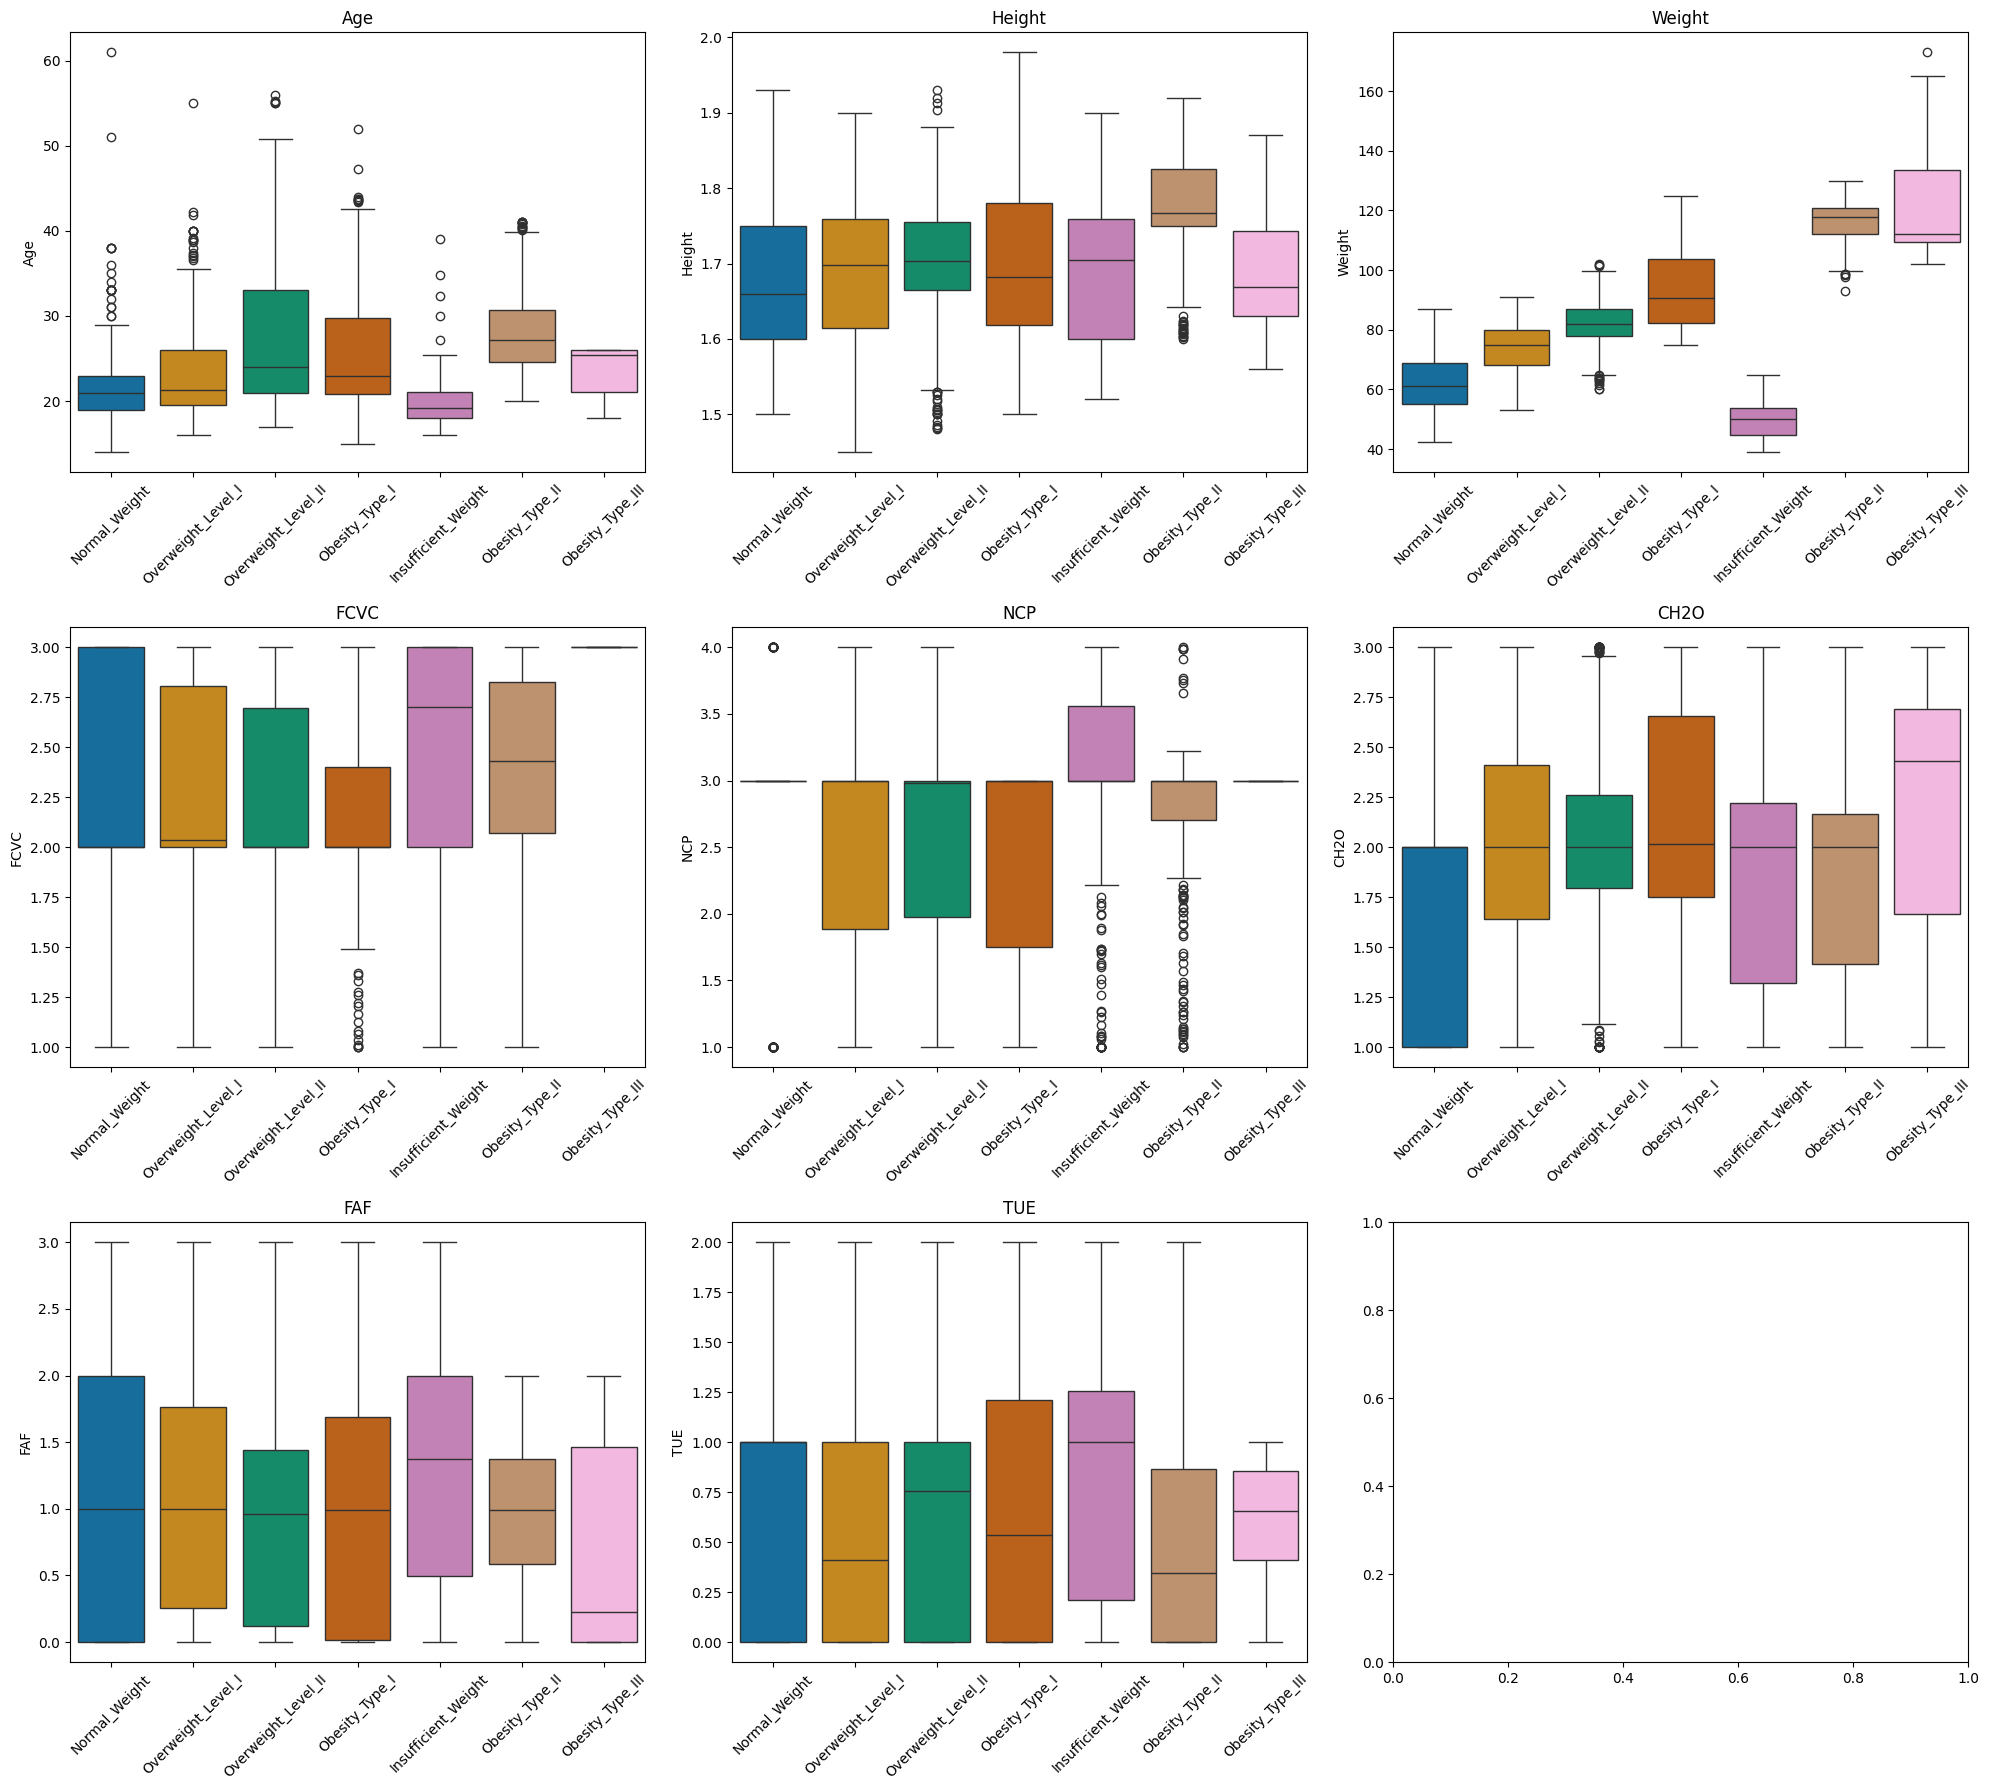

In [125]:
# 수치형 변수(num_col)
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='NObeyesdad', y=col, ax=axes[i],
                hue='NObeyesdad', palette='colorblind', legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

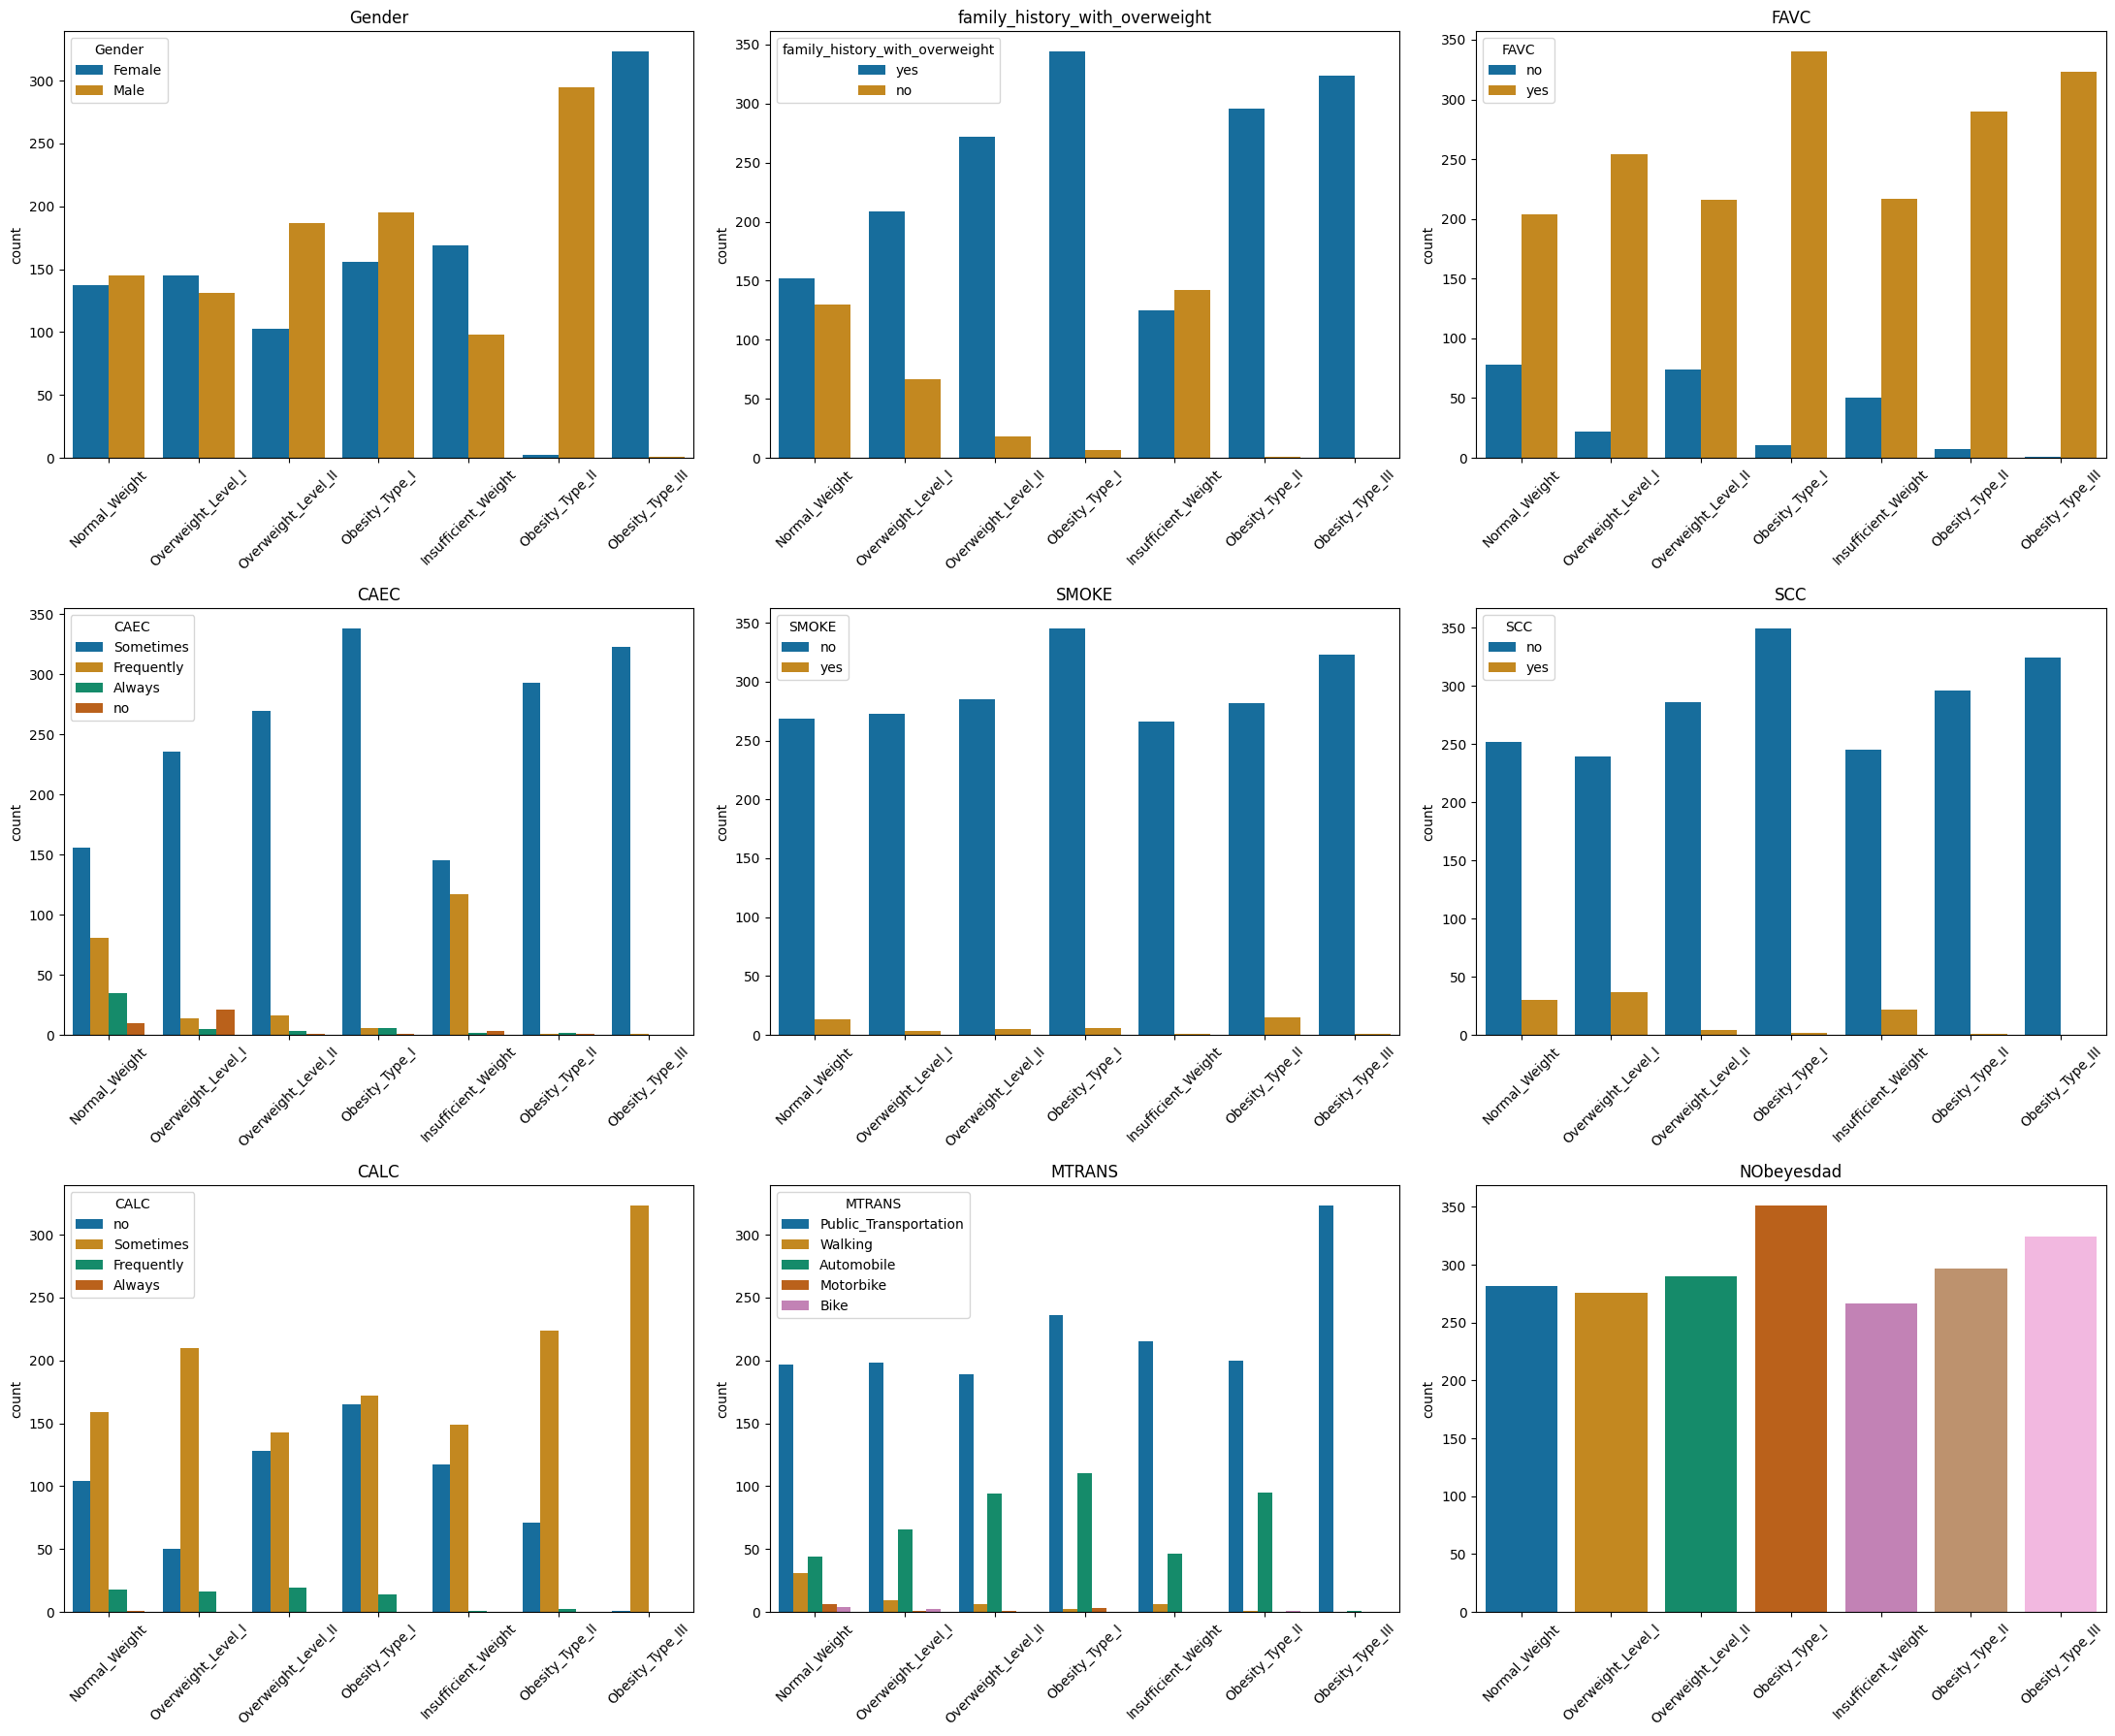

In [132]:
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x='NObeyesdad', hue=col, data=df, ax=axes[i], palette='colorblind')
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 상관관계 확인 (Heatmap)

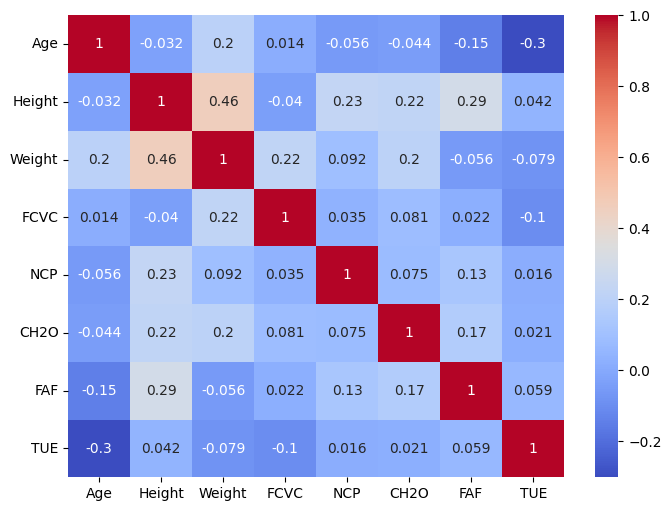

In [95]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

- SMOTE로 인해 관계 및 범주형의 라벨링이 희석되어 상관관계가 명확히 보이지는 않다.  
- '키'와 '몸무게'는 양의 상관관계이다. (0.46)
- '나이'와 '전자기기 사용'은 음의 상관관계이다. (-0.3)
- '키'와 '신체활동'은 양의 상관관계이다. (0.29)
  * 이는 성별과 연관되어 있을 가능성이 존재한다. (남자가 활동이 많은 것처럼)

### 범주형 변수 추가 EDA
- https://wikidocs.net/161870#phi-correlation-coefficient-cramers-v-coefficient

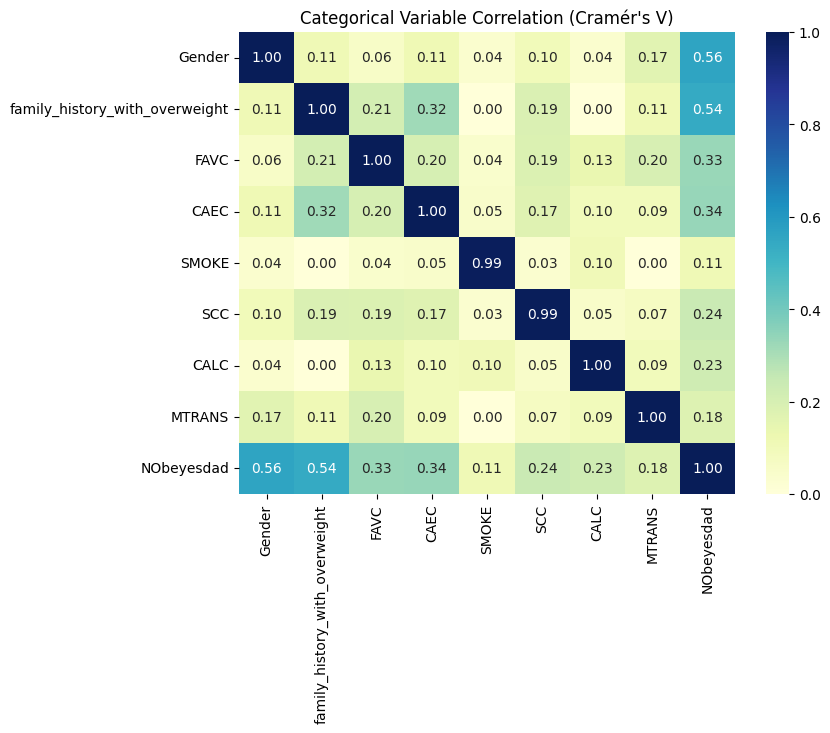

In [98]:
# 범주형 크래머 V 계수를 활용한 상관관계 확인 (카이제곱)
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows = []
for x in cat_cols:
    col = []
    for y in cat_cols:
        col.append(cramers_v(df[x], df[y]))
    rows.append(col)

v_matrix = pd.DataFrame(rows, columns=cat_cols, index=cat_cols)

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(v_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Categorical Variable Correlation (Cramér's V)")
plt.show()

- '성별'과 '비만 지수'는 강한 연관관계가 존재한다. (0.56)
- '가족력'과 '비만 지수'는 강한 연관관계가 존재한다. (0.54)
- '고칼로리 식습관'과 '비만 지수'는 양의 상관관계이다. (0.33)
- '식간 간식'과 '비만 지수'는 양의 상관관계이다. (0.34)
- '가족력'과 '식간 간식'은 양의 상관관계이다. (0.32)

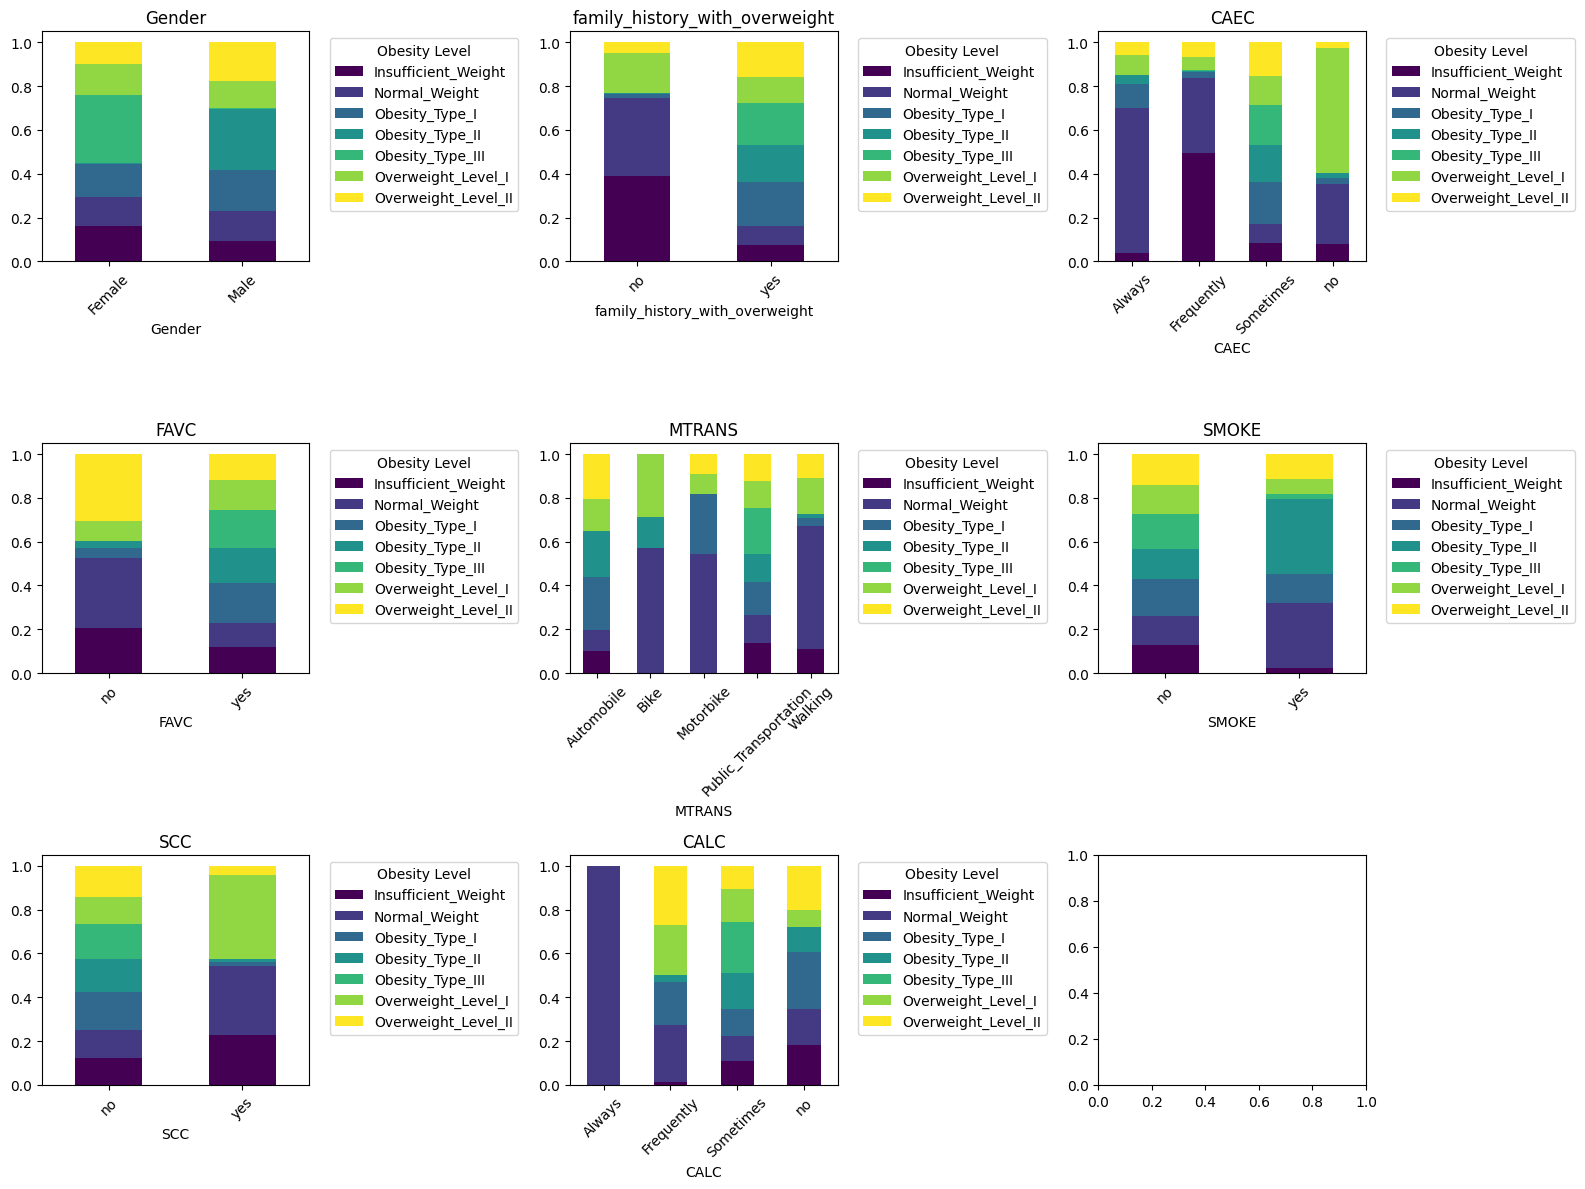

In [108]:
# 정규화 비율 누적 막대 그래프
target_features = ['Gender', 'family_history_with_overweight', 'CAEC', 'FAVC', 'MTRANS', 'SMOKE', 'SCC', 'CALC']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(target_features):
    ct = pd.crosstab(df[col], df['NObeyesdad'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
    axes[i].set_title(col)
    axes[i].legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# 추후 분석 방향
- Feature Engineering: BMI 지수나 실제 비만 수준에 연관이 있을만한 피쳐들을 합치는 작업 진행, 또한 범주형 변수 9개를 One-Hot Encoding을 통한 라벨링 진행
- 데이터셋 목적 구체화: 해당 데이터셋으로 진행할 수 있는 다양한 분석 주제 중 하나의 방향을 구체화하여 모델링 및 Baseline 작성
- 데이터 검증: 77%의 데이터가 SMOTE로 만들어져 있기에, 데이터셋의 성능을 모델링을 통해 검증 진행
- 모델링: 트리 앙상블 기법이나, XAI를 통해 해석력을 보충하여 "전통적인 BMI지표가 포착하지 못하는 생활 습관 기반의 비만 위험도를 규명하고, 검증"하도록 진행